In [370]:
import numpy as np
import matplotlib.pyplot as plt

In [371]:
import imageio as iio
from skimage import color, transform

In [372]:
from PIL import Image

rgb_img = iio.v2.imread('Unicaen’s phoenix.jpg')

#im = color.rgb2gray(rgb_img)

#% Load a real image
#x_true = Image.open('Unicaen’s phoenix.png')
#x_true = Image.rgb2gray(x_true)

#%It uses the hue-saturation-value (HSV) colour model, where the hue represents the phase, the saturation represents the modulus
#% Convert the image to HSV
HSV = color.rgb2hsv(rgb_img)
H = HSV[:, :, 0]
S = HSV[:, :, 1]
V = HSV[:, :, 2]
(N3, N1) = S.shape

S_ext = np.zeros((N3 + 2 * int(N3/10),N1 + 2 * int(N1/10)))
H_ext = S_ext.copy() #to save the right extension S_ext. Else,  it seems to change the matrix S_ext
(N3e, N1e) = S_ext.shape

S_ext[int(N3/10):N3e - int(N3/10),int(N1/10): N1e - int(N1/10)] =  S #2 * np.ones((int(8 * N3/10),int(8 * N1/10)))

#plt.imshow(S_ext)
H_ext[int(N3/10):N3e - int(N3/10),int(N1/10): N1e - int(N1/10)] =  H #2 * np.ones((int(8 * N3/10),int(8 * N1/10)))

#iio.imwrite('Unicaen’s phoenix.jpg', x_true)
#x_true = transform.resize(x_true, (Nx,Ny))
#x_true /= np.max(x_true)
'''
# Spatial coordinates
radius = 4e-0
x1 = np.linspace(-5e-0, 5e-0, N1)
x3 = np.linspace(-5e-0, 5e-0, N3)
[X1, X3] = np.meshgrid(x1, x3)
cut_off = (np.sqrt(X1**2 + X3**2) < radius)


print(cut_off)
S = S * cut_off
H = H * cut_off
'''
#plt.imshow(S_ext)

# Define the complex image using S and H
image = S_ext * np.exp(1j * 2 * H_ext) 
#plt.imshow(S_ext)
'''
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(H, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(S)
ax2.set_title("Saturation channel")
ax2.axis('off')
ax3.imshow(V)
ax3.set_title("Value channel")
ax3.axis('off')

fig.tight_layout()

'''

'\nfig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(8, 2))\n\nax0.imshow(rgb_img)\nax0.set_title("RGB image")\nax0.axis(\'off\')\nax1.imshow(H, cmap=\'hsv\')\nax1.set_title("Hue channel")\nax1.axis(\'off\')\nax2.imshow(S)\nax2.set_title("Saturation channel")\nax2.axis(\'off\')\nax3.imshow(V)\nax3.set_title("Value channel")\nax3.axis(\'off\')\n\nfig.tight_layout()\n\n'

In [373]:
#image - (0 * image.real + 1j * image.imag)

In [374]:
'''
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

radius = 7e-0
x1 = np.linspace(-5e-0, 5e-0, N1)
x3 = np.linspace(-5e-0, 5e-0, N3)
[X1, X3] = np.meshgrid(x1, x3)

S = (np.sqrt(X1**2 + X3**2) < radius)
print(S)
fig2, ax2 = plt.subplots(ncols=1, subplot_kw={"projection": "3d"})

# Plot a 3D surface
surf1 = ax2.plot_surface(X1, X3, X1**2 + X3**2)
fig.colorbar(surf1, ax=ax2, shrink=0.5, aspect=5)



plt.show

'''
'''
print(image.imag.shape)

img = image.imag
new_width  = int(image.imag.shape[0]/10)
new_height = int(image.imag.shape[1]/10)
x_true = img.resize(new_width * new_height,  refcheck=False)
#img.save('output image name.png') # format may what you want *.png, *jpg, *.gif


plt.imshow(x_true)

'''

"\nprint(image.imag.shape)\n\nimg = image.imag\nnew_width  = int(image.imag.shape[0]/10)\nnew_height = int(image.imag.shape[1]/10)\nx_true = img.resize(new_width * new_height,  refcheck=False)\n#img.save('output image name.png') # format may what you want *.png, *jpg, *.gif\n\n\nplt.imshow(x_true)\n\n"

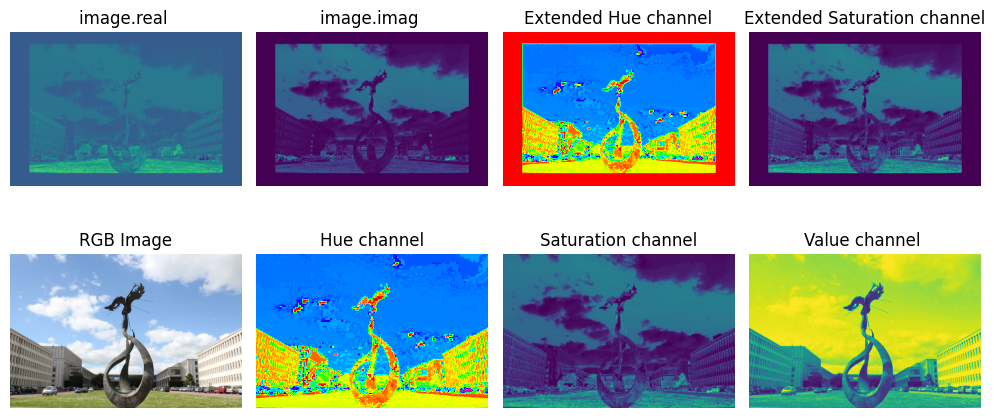

In [375]:
fig, ((ax00, ax01, ax02, ax03), (ax10, ax11, ax12, ax13)) = plt.subplots(nrows = 2, ncols=4, figsize=(10,5))

ax00.imshow(image.real) 
ax00.set_title("image.real ")
ax00.axis('off')
ax01.imshow(image.imag) 
ax01.set_title("image.imag ")
ax01.axis('off')
ax02.imshow(H_ext, cmap='hsv')
ax02.set_title("Extended Hue channel")
ax02.axis('off')
ax03.imshow(S_ext)
ax03.set_title("Extended Saturation channel")
ax03.axis('off')

ax10.imshow(rgb_img)
ax10.set_title("RGB Image")
ax10.axis('off')
ax11.imshow(H, cmap='hsv')
ax11.set_title("Hue channel")
ax11.axis('off')
ax12.imshow(S)
ax12.set_title("Saturation channel")
ax12.axis('off')
ax13.imshow(V) 
ax13.set_title("Value channel ")
ax13.axis('off')


fig.tight_layout()

(-0.5, 15.5, 15.5, -0.5)

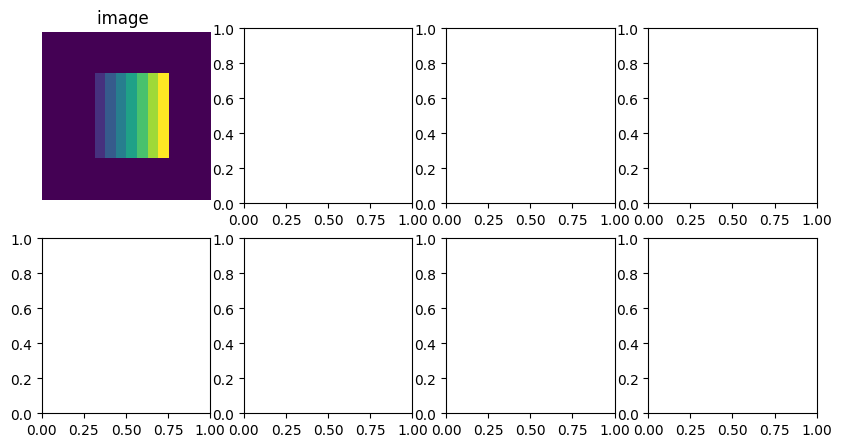

In [376]:
#img = rgb_img #image.imag
from PIL import Image

#img = Image.open('/your image path/image.jpg') # image extension *.png,*.jpg
#new_width  = 16
#new_height = 16
im = image.imag
'''
(width, height) = im.shape
top = height / 4
right = 164
bottom = 3 * height / 4
'''
#img.save('output image name.png') # format may what you want *.png, *jpg, *.gif

# Cropped image of above dimension
# (It will not change original image)
#im1 = im.crop((left, top, right, bottom))
 
# Shows the image in image viewer

(Nx, Ny) = 16, 16
n = Nx * Ny
m = n

x_true = im[500:516, 500:516]

x_true = (1 + 0j) * np.zeros((Nx,Ny))
#x_true[0, 0] = 2.
i, k = np.meshgrid(np.arange(int(Nx/2)), np.arange(int(Ny/2)))
omega = np.exp( - 2 * np.pi * 1j /int(Nx/2) * int(Ny/2) )
x_true[int(Nx/4):int(3*Nx/4),int(Ny/4):int(3*Ny/4)] = (i + k *1j) * np.ones((int(Nx/2),int(Ny/2)))
x_true_real = x_true.real
x_true_imag = x_true.imag
#x_true = x_true_real
fig, ((ax00, ax01, ax02, ax03), (ax10, ax11, ax12, ax13)) = plt.subplots(nrows = 2, ncols=4, figsize=(10,5))

ax00.imshow(x_true_real) 
ax00.set_title("image ")
ax00.axis('off')

##plt.imshow(-1j * x_true)
#plt.colorbar()

In [377]:
from numpy.fft import fftn, ifftn, fftshift, ifftshift
import scipy as sp

sensingModel = "iid stdd Gauss dist"
#sensingModel = "Fourier Matrix"

if sensingModel == "iid stdd Gauss dist":
    A = 1. * np.random.normal(0,1, size = (m,n)) # i.i.d. std Gaussian 
    A = np.eye(n)

if sensingModel == "Fourier Matrix":
    
    def DFT_matrix(N):
        i, j = np.meshgrid(np.arange(N), np.arange(N))
        omega = np.exp( - 2 * np.pi * 1j / N )
        W = np.power( omega, i * j ) / np.sqrt(N)  
        return W
    
    def dft_matrix(N):
        w = np.exp((-2 * np.pi * 1j) / N)  # remove the '-' for inverse fourier
        r = np.arange(N)
        w_matrix = np.vander(w ** r, increasing=True)  # faster than meshgrid
        return w_matrix / np.sqrt(N)
    '''
    def dftmtx(N):
        return sp.fft(sp.eye(N))
    '''
    A = dft_matrix(n)
#print(DFT_matrix(2))

In [378]:
noise = 0.001 * (1. + 0.j) * np.random.normal(0, 1, size = (m,))
noise = np.abs(noise)
#noise /= np.max(noise) 

x_true_vect = x_true.reshape(n,)

def operator(x):
    z = A @ x
    return z * np.conjugate(z)
meas = operator(x_true_vect) + (noise * np.conjugate(noise))**(0.5)

In [379]:
#print(A[0], x_true_vect, noise, np.dot(noise, noise), meas)
#print(noise)
#operator(x_true_vect)

In [380]:
'''
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot(121)

trueIm = ax.imshow(x_true)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(trueIm, cax=cax, orientation='vertical')
ax.set_title('True Image')
'''

"\nfig = plt.figure(figsize = (16, 6))\nax = fig.add_subplot(121)\n\ntrueIm = ax.imshow(x_true)\ndivider = make_axes_locatable(ax)\ncax = divider.append_axes('right', size='5%', pad=0.05)\nfig.colorbar(trueIm, cax=cax, orientation='vertical')\nax.set_title('True Image')\n"

In [381]:
import numdifftools as nd

In [382]:
def psi(x):
    return 0.25 * np.linalg.norm(x)**4 + 0.5 *  np.linalg.norm(x)**2
def grad_psi_num(x):#numerical real derivative
    return nd.Gradient(psi)(x)
def grad_psi_(x):#real derivative _real
    return (np.linalg.norm(x)**2 + 1) * x
#'''
def grad_psi(z):#Wirtinger derivative
    return .5 * (np.linalg.norm(z)**2 + 1) * np.conjugate(z)
#'''
def breg_psi(x, u):
    return psi(x) - psi(u) - np.dot(grad_psi(u), x-u)

def f_old(x): # f in slow loop form 
    s = 0
    for r in range(m):
        s += (meas[r] - np.dot(A[r], x)**2 )**2 
    return s/(4*m)
def f(x): # f in fast matrix form
    s = np.linalg.norm(meas- operator(x) )**2 
    return (s/4/m)
def grad_f_num(x): #numerical real derivative
    return nd.Gradient(f)(x)
def grad_f_(x): #real derivative, fast matrix form _real
    z = A @ x
    a = A.T @ ( z*( z**2 - meas))
    return a / m
def grad_f_true_real(x): #real derivative, slow loop form 
    s = 0
    for r in range(m):
        s +=  ( np.linalg.norm(np.dot(A[r], x))**2 - meas[r]) * np.conjugate(A[r]) * np.dot(A[r], x)
    return s / m
#'''
def grad_f_theirs(x): #Wirtinger derivative, fast matrix form
    z = np.conjugate(A) @ x
    a = A.T @ ( z*( z * np.conjugate(z) - meas))
    return a / (2*m)
def grad_f(x): #Wirtinger derivative, fast matrix form
    z = A @ x
    a = np.conjugate(A).T @ ( z*( z * np.conjugate(z) - meas))
    return a / (2*m)
#'''
def grad_f_true_compl(x): #Wirtinger derivative, slow loop form
    s = 0
    for r in range(m):
        s +=  ( np.linalg.norm(np.dot(A[r], x))**2 - meas[r]) * A[r] * np.dot(np.conjugate(A[r]), x)
    return s / (2*m)
'''
def grad_f_true_compl_flow(x): #Wirtinger flow, slow loop form
    s = 0
    for r in range(m):
        s +=  ( np.linalg.norm(np.dot(A[r], x))**2 - meas[r]) * np.conjugate(A[r]) * np.dot(A[r], x)
    return s / (2*m)
'''
def breg_f(x, u):
    return f(x) - f(u) - np.dot(grad_f(u), x-u) 

x = (1 + 0j)*np.random.normal(0, 1, size = (n,))

#print(np.linalg.norm(grad_psi_real(x)  - grad_psi_num(x)))
print(np.linalg.norm(grad_f_true_compl(x)  - grad_f(x)))

print(f(x_true_vect))

0.0
2.7947492940033026e-07


In [383]:
np.linalg.norm(A, axis = -1).shape

(256,)

In [384]:
def smoothnessPara_L_old(A, noise):
    m = A.shape[0]
    L = 0.
    for r in range(m):
        L += np.vdot( A[r, :], A[r, :]) * (3*np.vdot( A[r, :], A[r, :]) + np.max(noise))
    return L/m

def smoothnessPara_L(A, noise):

    z = np.linalg.norm(A, axis = -1)**2
    L = np.mean( z * ( 3*z + np.max(noise)))
    return L

#print(smoothnessPara_L_old(A, noise) - smoothnessPara_L(A, noise))

In [385]:
def spectInit(meas, A):
    n = A.shape[1]
    m = A.shape[0]
    s1 = np.sum(meas)
    s2 = np.sum( [np.vdot( A[r, :], A[r, :]) for r in range(m)])
    lamda = np.sqrt(n*s1/s2)

    Y = np.zeros((n,n))

    for r in range(m):
        Y += meas[r] * A[r].reshape(1, n) @ np.conjugate(A[r]).reshape(1, n).T
    Y /= m 
    eigenval, eigenvect = np.linalg.eig(Y)
    x0 = eigenvect.real[eigenval.real == max(eigenval.real)][0]  #Complex eigenvalues
    x0 *= lamda/np.linalg.norm(x0)
    return [x0, eigenval.real, eigenvect.real]

In [386]:
#print(spectInit(meas, A).shape)
#[x, Val, Vec] = spectInit(meas, A)
#print("x", x, "eigenvalues,", Val, "eigenvectors", Vec)

In [387]:
def grad_psi_star(z):
  b = np.linalg.norm(z)
  a = b**2
  print('a', a)
  
  if a == 0.:
    return z
  else: 
    '''
    c = b**3 * (3*(27*a+4))**(0.5) + 9* (a**2)
    t = (2 * c**2)**(1/3) - 2 * a * (3**(1/3))
    t /= a * ((36 * c)**(1/3))
    '''      
    p = [a, 0., 1., -1.]
    #print(p)
    t = np.roots(p)
    t = t.real[abs(t.imag) == 0. ][0]
    print('t', t)
    #import pdb
    #pdb.set_trace()
    return  t*z

In [388]:
def mirrorDescent(L, kappa, xi, algo):
    iterates = []
    #x, Val, Vec = spectInit(meas, A)
    #x = x_true_vect  + (1 + 1j)* np.random.normal(0, 1, size = x_true_vect.shape) * 1./1000
    #'''
    x = np.random.uniform(0, 6, size = (n, ) )
    x = x * (x_true_vect > 0.)
    #'''
    
    mag = np.linalg.norm(x)**2
    iterates.append(x)

    if algo == 'provable':
        for k in range(maxiter):
            j = 0
            while  True:   
                L /= xi
                gamma = (1-kappa)/(L) #*mag 
                #print(gamma)
                x = iterates[k]
                z = grad_psi(x) - gamma * grad_f(x)
                x_temp  = grad_psi_star(z)

                #print('iterate x: ', iterates[k], 'x_temp ', x_temp )
                print(f"A: {breg_f(x_temp, iterates[k])} B: { L * breg_psi(x_temp, iterates[k])}")
                print('while loop', j, "L", L, "gap", breg_f(x_temp, iterates[k]) - L * breg_psi(x_temp, iterates[k]))
                
                if breg_f(x_temp, iterates[k]) >  L  * breg_psi(x_temp, iterates[k]):
                    #print(f"A: {breg_f(x_temp, iterates[k])} B: { L * breg_psi(x_temp, iterates[k])}")
                    #print("hi")               
                    L *= xi
                    gamma = (1-kappa)/L 
                    x = iterates[k]
                    z = grad_psi(x) - gamma * grad_f(x)
                    x = grad_psi_star(z)
                    iterates.append(x)
                    break  
                #print("ho")
                j += 1 
                #if j % 10 == 0:
            '''    
            if f(x)  < f(iterates[k]) :
                iterates.append(x)
            else:
                break   
            '''            


            '''
                if j > 1:
                    print('while loop', j, "L", L, "gap", breg_f(x_temp, iterates[k]) - L * breg_psi(x_temp, iterates[k]))
                
                if j> 20:
                    break
                '''
                    
            if k % 1 == 0:
            
               print('iterate', k+1)
        
    if algo == 'stable':
        for k in range(maxiter):
            j = 0

            x_temp = x
            while  True:   
                
                gamma = (1-kappa)/L 

                z = grad_psi(x) - gamma * grad_f(x)
                x_prev = x_temp
                
                x_temp  = grad_psi_star(z)


                print(np.linalg.norm(x_prev-x_temp))
                L /= xi

                print(f"A: {breg_f(x_temp, iterates[k])} B: {xi * L * breg_psi(x_temp, iterates[k])} C: {breg_psi(x_temp, iterates[k])}")
                    
                if breg_f(x_temp, iterates[k]) <= xi * L  * breg_psi(x_temp, iterates[k]):
                    print(f"A: {breg_f(x_temp, iterates[k])} B: {xi * L * breg_psi(x_temp, iterates[k])}")
                    #print("hi")
                    x = x_temp
                    L *= xi
                    break
                
                #print("ho")
                j += 1 
                #if j % 10 == 0:
                print('while loop', j, "L", L, "gap", breg_f(x_temp, iterates[k]) - xi * L * breg_psi(x_temp, iterates[k]))
        
           
            
            iterates.append(x)
            
            if k % 2 == 0:
            
               print('iterate', k+1)

    if algo == 'none':
        for k in range(maxiter):
            j = 0

            while  True:   
                L /= xi
                gamma = (1-kappa)/L 

                z = grad_psi(x) - gamma * grad_f(x)
                x_temp  = grad_psi_star(z)

                
                if breg_f(x_temp, iterates[k]) <= xi * L  * breg_psi(x_temp, iterates[k]):
                    print(f"A: {breg_f(x_temp, iterates[k])} B: {xi * L * breg_psi(x_temp, iterates[k])}")
                    #print("hi")
                    x = x_temp
                    break
                
                #print("ho")
                j += 1 
                #if j % 10 == 0:
                print('while loop', j, "L", L, "gap", breg_f(x_temp, iterates[k]) - xi * L * breg_psi(x_temp, iterates[k]))
        
            L *= xi
            
            iterates.append(x)
            
            if k % 2 == 0:
            
               print('iterate', k+1)        

    return iterates

In [389]:
maxiter = 50

L = 1 * smoothnessPara_L(A, noise)
kappa  = 0.9

#algo = 'stable'
#xi = 0.1
algo = 'provable'
xi = 10
#algo = 'none'
x_sols = mirrorDescent(L, kappa, xi, algo)

a 112021324.16571246
t 0.0020730002620347756
A: (5.316232752213747+0j) B: (-8380.62138595025+0j)
while loop 0 L 0.3002933769497924 gap (8385.937618702463+0j)
a 112016906.80871226
t 0.0020730274922263056
iterate 1
a 28007355.268875744
t 0.003289266119218555
A: (4.049714882092015+0j) B: (-3326.844564474055+0j)
while loop 0 L 0.3002933769497924 gap (3330.894279356147+0j)
a 28004539.54017723
t 0.0032893762346229817
iterate 2
a 7002671.21612742
t 0.005217807932503244
A: (2.828749420084019+0j) B: (-1320.8882322090794+0j)
while loop 0 L 0.3002933769497924 gap (1323.7169816291635+0j)
a 7001288.504137306
t 0.0052181508055106195
iterate 3
a 1751005.237994763
t 0.00827373214928558
A: (1.8916796055658782+0j) B: (-524.5925960206232+0j)
while loop 0 L 0.3002933769497924 gap (526.4842756261891+0j)
a 1750390.4273006439
t 0.00827469804367252
iterate 4
a 437886.88435682585
t 0.013110989167608451
A: (1.2347270873267266+0j) B: (-208.43583945085993+0j)
while loop 0 L 0.3002933769497924 gap (209.67056653818

In [390]:
x_sols_imag = np.imag(x_sols)
x_sols_real = np.real(x_sols)

In [391]:
x_sols = x_sols_real
#x_sols = x_sols_imag

x_true = x_true_real
#x_true = x_true_imag

x_true_vect_test = x_true.reshape(n,)
meas_test = operator(x_true_vect_test) + (noise * np.conjugate(noise))**(0.5)
def f_test(x): # f in fast matrix form
    s = np.linalg.norm(meas_test- operator(x) )**2 
    return (s/4/m)
print(f_test(x_true_vect_test))

f_x_sols  = [f_test(x) for x in x_sols]
NIter = len(f_x_sols)

2.7947492940033005e-07


'\ncb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])\ncbar = fig.colorbar(retrievedImg, cax=cb_ax)\n'

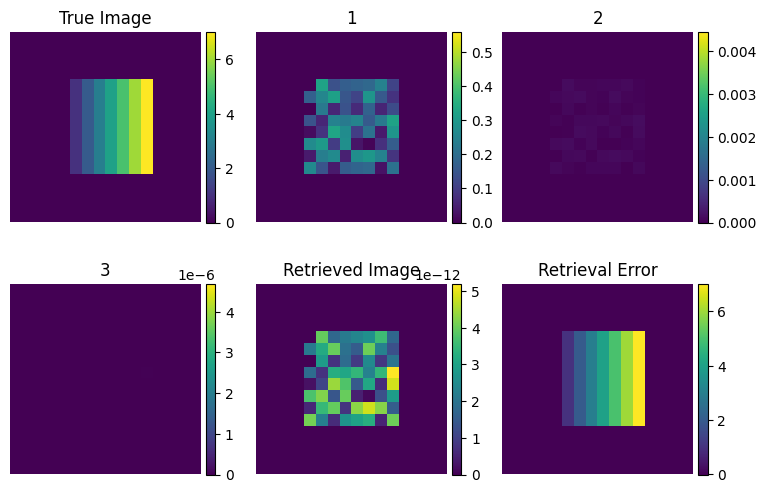

In [392]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(2, 3 , figsize=(9, 6))

ax0 = axes.flat[0]
ax0.set_axis_off()
trueIm = ax0.imshow(x_true, cmap='viridis',vmin=np.min(x_true), vmax=np.max(x_true))
divider = make_axes_locatable(ax0)
cax0 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(trueIm, cax=cax0, orientation='vertical')
ax0.set_title('True Image')

ax1 = axes.flat[1]
ax1.set_axis_off()
retrievedImg = ax1.imshow(x_sols[int(NIter/4)].reshape(Nx, Ny) , cmap='viridis',vmin=min(x_sols[int(NIter/4)]), vmax=max(x_sols[int(NIter/5)]))
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(retrievedImg, cax=cax1, orientation='vertical')
ax1.set_title('1')

ax2 = axes.flat[2]
ax2.set_axis_off()
retrievedImg = ax2.imshow(x_sols[int(2 * NIter/4)].reshape(Nx, Ny) , cmap='viridis',vmin=min(x_sols[int( 2* NIter/4)]), vmax=max(x_sols[int(2 * NIter/5)]))
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(retrievedImg, cax=cax2, orientation='vertical')
ax2.set_title('2')

ax3 = axes.flat[3]
ax3.set_axis_off()
retrievedImg = ax3.imshow(x_sols[int(3 * NIter/4)].reshape(Nx, Ny) , cmap='viridis',vmin=min(x_sols[int(3 * NIter/4)]), vmax=max(x_sols[int(3 * NIter/5)]))
divider = make_axes_locatable(ax3)
cax3 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(retrievedImg, cax=cax3, orientation='vertical')
ax3.set_title('3')
'''
ax4 = axes.flat[4]
ax4.set_axis_off()
retrievedImg = ax4.imshow(x_sols[int(4 * maxiter/5)].reshape(Nx, Ny) , cmap='viridis',vmin=min(x_sols[int(4 * maxiter/5)]), vmax=max(x_sols[int(4 * maxiter/5)]))
divider = make_axes_locatable(ax4)
cax4 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(retrievedImg, cax=cax4, orientation='vertical')
ax4.set_title('4')
'''
ax4 = axes.flat[4]
ax4.set_axis_off()
retrievedImg = ax4.imshow(x_sols[-1].reshape(Nx, Ny) , cmap='viridis',vmin=min(x_sols[-1]), vmax=max(x_sols[-1]))
divider = make_axes_locatable(ax4)
cax4 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(retrievedImg, cax=cax4, orientation='vertical')
ax4.set_title('Retrieved Image')

error = x_true - x_sols[-1].reshape(Nx, Ny) # not a good measure since phase retrieval solutions are non unique
error_vect = error.reshape(n,)

ax5 = axes.flat[-1]
ax5.set_axis_off()
retrievedImg = ax5.imshow(error , cmap='viridis',vmin=min(error_vect), vmax=max(error_vect))
divider = make_axes_locatable(ax5)
cax5 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(retrievedImg, cax=cax5, orientation='vertical')
ax5.set_title('Retrieval Error')

'''
cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(retrievedImg, cax=cb_ax)
'''

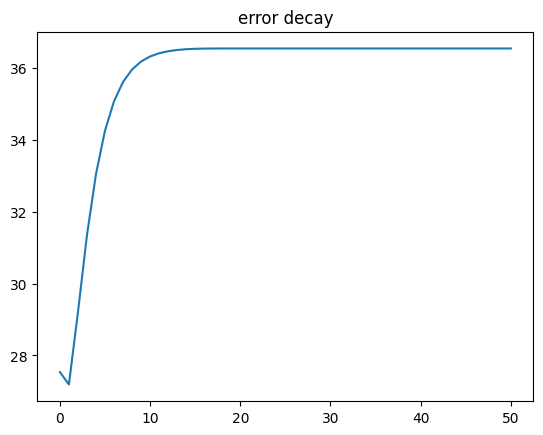

In [393]:
K = np.arange(len(f_x_sols))
plt.plot(K, f_x_sols)
plt.title('error decay')
plt.show()